<a href="https://colab.research.google.com/github/SamuelBM21/IC/blob/main/FashionMnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/fashion-mnist_train.csv')

In [ ]:
data = np.array(df)
m,n = data.shape
np.random.shuffle(data)

data_train=data.T
Y_train=data_train[0]         #labels
X_train=data_train[1:n]       #Values
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
def ReLU(Z):
    return np.maximum(0,Z);

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def init_params():
    w1 = np.random.rand(10, 784) * np.sqrt(2/784)
    #b1 = np.random.rand(10, 1) - 0.5
    b1 = np.zeros((10, 1))
    w2 = np.random.rand(10, 10) * np.sqrt(2/10)
    #b2 = np.random.rand(10, 1) - 0.5
    b2 = np.zeros((10, 1))
    return w1, b1, w2, b2

In [ ]:
def forward_prop(w1, b1, w2, b2, X):
    z1 = w1.dot(X) + b1
    a1 = ReLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1, a1, z2, a2

In [ ]:
def back_prop(z1, a1, z2, a2, w2, Y, X):
    one_hot_Y = np.zeros((Y.size,10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    dZ2 = a2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(a1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = w2.T.dot(dZ2) * (z1 > 0)
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def compute_loss(a2, Y):
    one_hot_Y = np.zeros((Y.size,10))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    loss = -np.sum(one_hot_Y * np.log(a2)) / Y.size
    return loss

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2
    return W1, b1, W2, b2

In [ ]:
def gradient_descent(X, Y, iterations, alpha, batch_size):
    w1, b1, w2, b2 = init_params()
    m = X.shape[1]
    for i in range(iterations):
        z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X)
        dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y, X)
        w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
                loss = compute_loss(a2, Y)
                acc = get_accuracy(get_predictions(a2), Y)
                print(f"Iteration {i} => Loss: {loss:.4f}, Accuracy: {acc:.4f}")
    return w1, b1, w2, b2

# def gradient_descent(X, Y, iterations, alpha, batch_size):
#     w1, b1, w2, b2 = init_params()
#     m = X.shape[1]  # número total de exemplos

#     for i in range(iterations):
#         permutation = np.random.permutation(m)
#         X_shuffled = X[:, permutation]
#         Y_shuffled = Y[permutation]

#         for j in range(0, m, batch_size):
#             end = j + batch_size
#             X_batch = X_shuffled[:, j:end]
#             Y_batch = Y_shuffled[j:end]

#             z1, a1, z2, a2 = forward_prop(w1, b1, w2, b2, X_batch)
#             dW1, db1, dW2, db2 = back_prop(z1, a1, z2, a2, w2, Y_batch, X_batch)
#             w1, b1, w2, b2 = update_params(w1, b1, w2, b2, dW1, db1, dW2, db2, alpha)

#         Monitoramento após cada iteração completa
#         if i % 10 == 0:
#             _, _, _, a2_full = forward_prop(w1, b1, w2, b2, X)
#             loss = compute_loss(a2_full, Y)
#             acc = get_accuracy(get_predictions(a2_full), Y)
#             print(f"Iteration {i}: Loss = {loss:.4f}, Accuracy = {acc:.4f}")

#     return w1, b1, w2, b2

In [ ]:
# Testing and evaluation
def test_prediction(index, W1, b1, W2, b2):
    labels = [
      "T-shirt/top",
      "Trouser",
      "Pullover",
      "Dress",
      "Coat",
      "Sandal",
      "Shirt",
      "Sneaker",
      "Bag",
      "Ankle boot"
    ]
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", labels[prediction[0]])
    print("Label: ", labels[label])
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

# Calculate accuracy
def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size           #Total de vezes que o valor foi igual ao label / pelo total de valores

def get_predictions(a2):
    return np.argmax(a2,0)

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = np.argmax(A2, 0)
    return predictions

In [ ]:
w1, b1, w2, b2=gradient_descent(X_train, Y_train, 500, 0.1, 64)

Iteration 0 => Loss: 2.3265, Accuracy: 0.1000
Iteration 10 => Loss: 2.3707, Accuracy: 0.1000
Iteration 20 => Loss: 2.2224, Accuracy: 0.1001
Iteration 30 => Loss: 2.0107, Accuracy: 0.2236
Iteration 40 => Loss: 1.6880, Accuracy: 0.4358
Iteration 50 => Loss: 1.4924, Accuracy: 0.5030
Iteration 60 => Loss: 1.3719, Accuracy: 0.5430
Iteration 70 => Loss: 1.2713, Accuracy: 0.5691
Iteration 80 => Loss: 1.1845, Accuracy: 0.5891
Iteration 90 => Loss: 1.1085, Accuracy: 0.6021
Iteration 100 => Loss: 1.0455, Accuracy: 0.6110
Iteration 110 => Loss: 0.9956, Accuracy: 0.6172
Iteration 120 => Loss: 0.9570, Accuracy: 0.6227
Iteration 130 => Loss: 0.9265, Accuracy: 0.6276
Iteration 140 => Loss: 0.9013, Accuracy: 0.6322
Iteration 150 => Loss: 0.8799, Accuracy: 0.6362
Iteration 160 => Loss: 0.8613, Accuracy: 0.6404
Iteration 170 => Loss: 0.8447, Accuracy: 0.6452
Iteration 180 => Loss: 0.8297, Accuracy: 0.6513
Iteration 190 => Loss: 0.8160, Accuracy: 0.6582
Iteration 200 => Loss: 0.8034, Accuracy: 0.6660
Ite

Prediction:  Sandal
Label:  Sandal


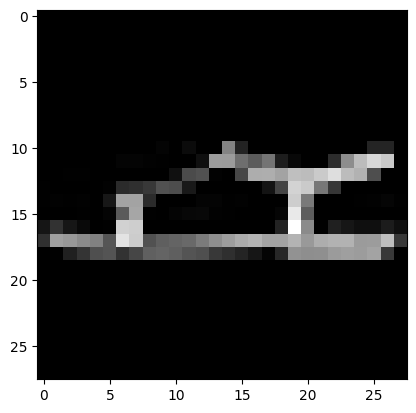

Prediction:  Sandal
Label:  Sandal


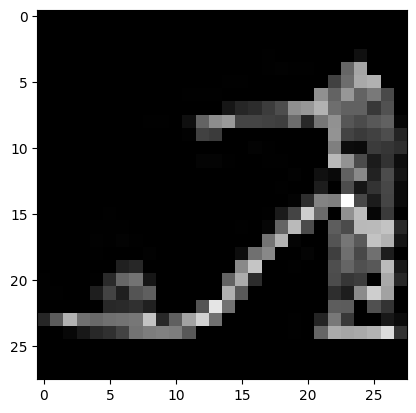

Prediction:  Bag
Label:  Bag


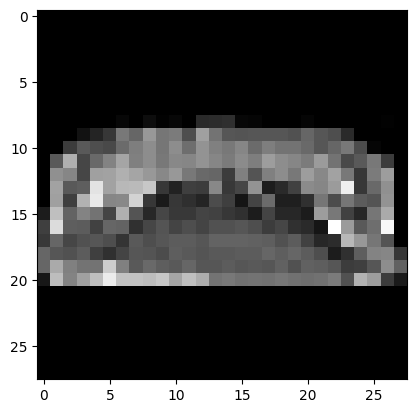

Prediction:  Pullover
Label:  Pullover


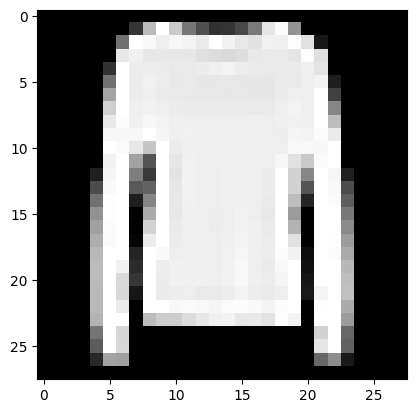

In [ ]:
test_prediction(652, w1, b1, w2, b2)
test_prediction(740, w1, b1, w2, b2)
test_prediction(291, w1, b1, w2, b2)
test_prediction(222, w1, b1, w2, b2)